In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
import string
import re

import nltk
from nltk.corpus import stopwords, words
from nltk.corpus import words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# nltk.download('words')

In [27]:
# chyron archive web address: https://archive.org/services/third-eye.php

import datetime

# pull chyrons from web as dataframes
def get_dfs(start_y=2017, start_m=9, start_d=7, end_today=True, end_y=None, end_m=None, end_d=None):
    
    first = datetime.date(start_y, start_m, start_d)
    delta = datetime.timedelta(weeks=1)
    last = first + delta
    dfs = []
    iters = 0
    
    if end_today:
        stop = datetime.date.today()
    else:
        stop = datetime.date(end_y, end_m, end_d)
    
    while first < stop:
        if iters > 210:
            break
        else:
            print(iters)
            first_str = first.strftime('%m/%d/%y')
            last_str = last.strftime('%m/%d/%y')
            url = f'https://archive.org/services/third-eye.php?dayL={first_str}&dayR={last_str}'
            df = pd.read_csv(url, delimiter='\t')
            dfs.append(df)

            first = last + datetime.timedelta(days=1)
            last = first + delta
            
            if last > stop:
                last = stop
                
            iters += 1
        
    return dfs

# cleans dfs
def clean_dfs(df, csv=True, concat=False, csv_name='chyron_next'):
    
    # stack dfs from list
    if concat:
        df = pd.concat(df, ignore_index=True)
        
    # drop duplicates
    df.drop_duplicates(subset=['text'], keep='first', inplace=True, ignore_index=True)
    
    # count words in chyron 
    df['num_words'] = df['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 'NaN')
    
    # save to local csv          
    if csv:
        df.to_csv(f'/Users/jonleckie/Desktop/DSI_all/capstones/capstone_two/chyrons/{csv_name}.csv')    
    
    return df

# wrapper for above functions --> NOT TESTED
def get_chyrons(start_y=2017, start_m=9, start_d=7, end_today=True, end_y=None, end_m=None, end_d=None):
    df = get_dfs(start_y, start_m, start_d, end_today, end_y, end_m, end_d)
    df = clean_dfs(df, csv=True, concat=False, csv_name='chyron2')
    return df

In [4]:
cryon_lst = get_dfs(start_y=2021, start_m=3, start_d=17, end_today=True)

0
1


In [5]:
len(cryon_lst)

2

In [ ]:
# secondary clean for chryon_all:

chryon_all.drop(472372, inplace=True) # index from this: chryon_all[chryon_all['num_words'] == 'NaN']

In [64]:
df = pd.DataFrame(cryon_lst[-2])

In [65]:
df

,date_time_(UTC),channel,duration,https://archive.org/details/,text
0,2021-03-10 00:00:00,CNNW,15,CNNW_20210309_230000_The_Situation_Room_With_W...,HOUSE SET TO PASS BIDEN'S COVID RELIEF PLAN TO...
1,2021-03-10 00:01:00,CNNW,30,CNNW_20210310_000000_Erin_Burnett_OutFront/sta...,HOUSE SET TO PASS BIDEN'S COVID RELIEF PLAN TO...
2,2021-03-10 00:01:00,MSNBCW,18,MSNBCW_20210310_000000_The_ReidOut/start/60,HOSPITALIZATIONS DECLINE AS VACCINATIDNS RAMP ...
3,2021-03-10 00:03:00,BBCNEWS,8,BBCNEWS_20210310_000000_BBC_World_News/start/180,m THOMAS MARKLE SPEAKS OUT. . HE. NEWS
4,2021-03-10 00:03:00,MSNBCW,24,MSNBCW_20210310_000000_The_ReidOut/start/180,CDC OFFERS NEW GUIDANCE FOR VACCINATEI] AMERIC...
...,...,...,...,...,...
18054,2021-03-16 23:53:00,FOXNEWSW,41,FOXNEWSW_20210316_230000_FOX_News_Primetime/st...,DEMS' RADICAL TAKEOVER ATTEMPT\n'WUW. . | GOV ...
18055,2021-03-16 23:53:00,MSNBCW,16,MSNBCW_20210316_230000_The_ReidOut/start/3180,FLORIDA OFFICIALS CUNGERNED ABOUT SPRING BREAK...
18056,2021-03-16 23:54:00,FOXNEWSW,31,FOXNEWSW_20210316_230000_FOX_News_Primetime/st...,GOV NEWSOM BLAMES GOP FOR RECALL EFFORTS\n'WUW...
18057,2021-03-16 23:54:00,MSNBCW,39,MSNBCW_20210316_230000_The_ReidOut/start/3240,FLORIDA OFFICIALS CUNCERNED ABOUT SPRING BREAK...


In [73]:
chyrons = pd.concat(cryon_lst, ignore_index=True)

In [74]:
len(chyrons)

3253973

In [76]:
chyrons.tail()

,date_time_(UTC),channel,duration,https://archive.org/details/,text
3253968,2021-03-16 23:53:00,FOXNEWSW,41.0,FOXNEWSW_20210316_230000_FOX_News_Primetime/st...,DEMS' RADICAL TAKEOVER ATTEMPT\n'WUW. . | GOV ...
3253969,2021-03-16 23:53:00,MSNBCW,16.0,MSNBCW_20210316_230000_The_ReidOut/start/3180,FLORIDA OFFICIALS CUNGERNED ABOUT SPRING BREAK...
3253970,2021-03-16 23:54:00,FOXNEWSW,31.0,FOXNEWSW_20210316_230000_FOX_News_Primetime/st...,GOV NEWSOM BLAMES GOP FOR RECALL EFFORTS\n'WUW...
3253971,2021-03-16 23:54:00,MSNBCW,39.0,MSNBCW_20210316_230000_The_ReidOut/start/3240,FLORIDA OFFICIALS CUNCERNED ABOUT SPRING BREAK...
3253972,2021-03-16 23:55:00,MSNBCW,63.0,MSNBCW_20210316_230000_The_ReidOut/start/3300,CDVID DENIERS 8: ANTI-VAXXERS PROLONGING PANDEMIC


In [77]:
#3/16/2021
# chyrons_since = get_dfs(start_y=2021, start_m=3, start_d=18, end_today=True)

0


In [80]:
chyrons.to_csv('/Users/jonleckie/Desktop/DSI_all/capstones/capstone_two/chyrons/chyron.csv')

In [93]:
chyrons = clean_dfs(chyrons)

In [90]:
chyrons.channel.unique()

array(['BBCNEWS', 'CNNW', 'FOXNEWSW', 'MSNBCW', nan], dtype=object)

In [95]:
chyrons.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652398 entries, 0 to 2652397
Data columns (total 6 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   date_time_(UTC)               2652398 non-null  object 
 1   channel                       2652397 non-null  object 
 2   duration                      2652397 non-null  float64
 3   https://archive.org/details/  2647435 non-null  object 
 4   text                          2652397 non-null  object 
 5   num_words                     205492 non-null   float64
dtypes: float64(2), object(4)
memory usage: 121.4+ MB


In [7]:
cryon2 = clean_dfs(cryon_lst, csv=False, concat=True, csv_name='chyron2')

In [9]:
cryon2.tail()

,date_time_(UTC),channel,duration,https://archive.org/details/,text,num_words
2111,2021-03-28 19:43:00,CNNW,31,CNNW_20210328_190000_CNN_Newsroom_With_Fredric...,DEREK CHAUVIN TRIAL BEGINS TOMORROW\nDEREK CHA...,23
2112,2021-03-28 19:44:00,MSNBCW,25,MSNBCW_20210328_190000_MSNBC_Live_With_Yasmin_...,NEW ANALYSIS SHOWS NATIONWIDE HOMES. FOR SALE ...,33
2113,2021-03-28 19:44:00,CNNW,29,CNNW_20210328_190000_CNN_Newsroom_With_Fredric...,DEREK CHAUVIN TRIAL BEGINS TOMORROW. . Former ...,34
2114,2021-03-28 19:45:00,MSNBCW,51,MSNBCW_20210328_190000_MSNBC_Live_With_Yasmin_...,NEW ANALYSIS SHOWS NUMBER OF AVAILABLE HOMES. ...,15
2115,2021-03-28 19:45:00,CNNW,45,CNNW_20210328_190000_CNN_Newsroom_With_Fredric...,DEREK CHAUVIN TRIAL BEGINS TOMORROW. . Trial i...,35


In [10]:
cryon2 = get_dfs(start_y=2021, start_m=3, start_d=17, end_today=True)

0
1


In [12]:
cryon2 = pd.concat(cryon_lst, ignore_index=True)

In [15]:
for i in cryon_lst:
    print(len(i))

0
2348


In [17]:
chyron2 = clean_dfs(cryon_lst, csv=True, concat=True, csv_name='chyron3_28')

In [18]:
chyron2.head()

,date_time_(UTC),channel,duration,https://archive.org/details/,text,num_words
0,2021-03-28 00:00:00,CNNW,10,CNNW_20210327_230000_CNN_Newsroom_With_Pamela_...,ACTIVISTS CALL NEW GEORGIA LAW DELIBERATE VOTE...,9
1,2021-03-28 00:01:00,MSNBCW,43,MSNBCW_20210328_000000_The_Week_With_Joshua_Jo...,PROTESTERS BATHER IN ATLANTA FUR VOTING RIGHTS...,13
2,2021-03-28 00:01:00,FOXNEWSW,23,FOXNEWSW_20210328_000000_Watters_World/start/60,AMERICA IS WATCHING 'THE TRUMAN SHOW'. . Wattn...,16
3,2021-03-28 00:02:00,CNNW,29,CNNW_20210328_000000_CNN_Newsroom_With_Pamela_...,GEORGIA ELECTION LAW PROTESTERS SHOW SUPPORT. ...,27
4,2021-03-28 00:02:00,BBCNEWS,12,BBCNEWS_20210328_000000_BBC_News/start/120,Army Genera\u2014l & Coup L-eader\nBE. NEWS,6


In [19]:
chyrons

NameError: name 'chyrons' is not defined

In [20]:
chyrons_og = pd.read_csv('chyron.csv')

In [23]:
chyrons_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253973 entries, 0 to 3253972
Data columns (total 6 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   date_time_(UTC)               object 
 2   channel                       object 
 3   duration                      float64
 4   https://archive.org/details/  object 
 5   text                          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 149.0+ MB


In [24]:
chryon_all = [chyrons_og, chyron2]

In [28]:
chryon_all = clean_dfs(chryon_all, csv=True, concat=True, csv_name='chyron_all')

In [31]:
chryon_all.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654347 entries, 0 to 2654346
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    2652398 non-null  float64
 1   date_time_(UTC)               2654347 non-null  object 
 2   channel                       2654346 non-null  object 
 3   duration                      2654346 non-null  object 
 4   https://archive.org/details/  2649329 non-null  object 
 5   text                          2654346 non-null  object 
 6   num_words                     2654347 non-null  object 
dtypes: float64(1), object(6)
memory usage: 141.8+ MB


In [45]:
chryon_all.num_words.unique()

array([6, 28, 8, 20, 9, 32, 19, 21, 14, 3, 11, 31, 12, 4, 17, 26, 29, 27,
       15, 23, 18, 7, 10, 33, 1, 2, 5, 16, 25, 22, 24, 30, 13, 35, 36, 34,
       37, 38, 40, 42, 39, 41, 44, 43, 46, 54, 45, 51, 52, 49, 50, 48, 53,
       47, 58, 81, 56, 57, 55, 60, 59, 78, 66, 65, 63, 61, 67, 71, 72, 87,
       62, 69, 89, 'NaN', 64, 83, 74, 75, 88, 73, 79, 99, 68, 102, 116,
       77, 76, 70, 104, 85, 82, 86, 98, 95, 97, 125, 103, 115, 114, 96,
       80, 111], dtype=object)

In [46]:
chryon_all[chryon_all['num_words'] == 'NaN']

,Unnamed: 0,date_time_(UTC),channel,duration,https://archive.org/details/,text,num_words
472372,568753.0,'chan' => [$c...,NaN,NaN,NaN,NaN,NaN


In [49]:
chryon_all.drop(472372, inplace=True)

In [50]:
chryon_all.num_words.unique()

array([6, 28, 8, 20, 9, 32, 19, 21, 14, 3, 11, 31, 12, 4, 17, 26, 29, 27,
       15, 23, 18, 7, 10, 33, 1, 2, 5, 16, 25, 22, 24, 30, 13, 35, 36, 34,
       37, 38, 40, 42, 39, 41, 44, 43, 46, 54, 45, 51, 52, 49, 50, 48, 53,
       47, 58, 81, 56, 57, 55, 60, 59, 78, 66, 65, 63, 61, 67, 71, 72, 87,
       62, 69, 89, 64, 83, 74, 75, 88, 73, 79, 99, 68, 102, 116, 77, 76,
       70, 104, 85, 82, 86, 98, 95, 97, 125, 103, 115, 114, 96, 80, 111],
      dtype=object)

In [51]:
len(chryon_all)

2654346

### Distributions of word counts:

* All networks

(array([9.24212e+05, 9.55745e+05, 7.21145e+05, 5.18620e+04, 1.21500e+03,
        1.29000e+02, 1.70000e+01, 1.00000e+01, 7.00000e+00, 4.00000e+00]),
 array([1.0, 13.4, 25.8, 38.2, 50.6, 63.0, 75.4, 87.8, 100.2,
        112.60000000000001, 125.0], dtype=object),
 <BarContainer object of 10 artists>)

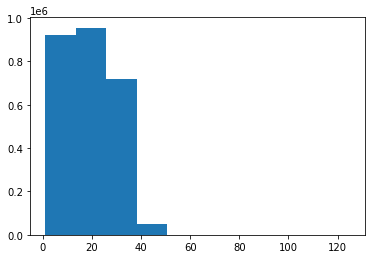

In [53]:
plt.hist(chryon_all['num_words'])

(array([475551.,      0.,      0., 775759.,      0.,      0., 685712.,
             0.,      0., 717324.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

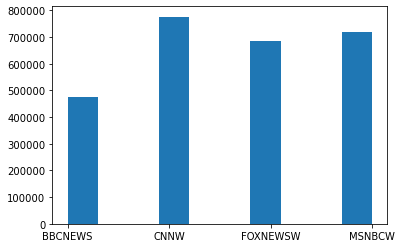

In [54]:
# distribution of entries per network

plt.hist(chryon_all['channel']);

In [57]:
chryon_all.channel.unique()

array(['BBCNEWS', 'CNNW', 'FOXNEWSW', 'MSNBCW'], dtype=object)

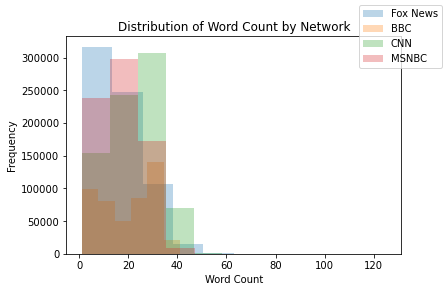

In [59]:
# distribution of word counts
fig, ax = plt.subplots()

fox = chryon_all[chryon_all['channel'] == 'FOXNEWSW']
bbc = chryon_all[chryon_all['channel'] == 'BBCNEWS']
cnn = chryon_all[chryon_all['channel'] == 'CNNW']
msnbc = chryon_all[chryon_all['channel'] == 'MSNBCW']

ax.hist(fox['num_words'], label='Fox News', alpha=0.3)
ax.hist(bbc['num_words'], label='BBC', alpha=0.3)
ax.hist(cnn['num_words'], label='CNN', alpha=0.3)
ax.hist(msnbc['num_words'], label='MSNBC', alpha=0.3)
ax.set_ylabel('Frequency')
ax.set_xlabel('Word Count')
ax.set_title('Distribution of Word Count by Network')
fig.legend();

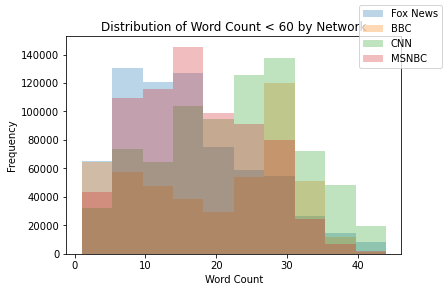

In [73]:
# distribution of word counts under 60
fig, ax = plt.subplots()

fox = chryon_all[(chryon_all['channel'] == 'FOXNEWSW') & (chryon_all['num_words'] < 60)]
bbc = chryon_all[(chryon_all['channel'] == 'BBCNEWS') & (chryon_all['num_words'] < 60)]
cnn = chryon_all[(chryon_all['channel'] == 'CNNW') & (chryon_all['num_words'] < 60)]
msnbc = chryon_all[(chryon_all['channel'] == 'MSNBCW') & (chryon_all['num_words'] < 60)]

ax.hist(fox['num_words'], label='Fox News', alpha=0.3)
ax.hist(bbc['num_words'], label='BBC', alpha=0.3)
ax.hist(cnn['num_words'], label='CNN', alpha=0.3)
ax.hist(msnbc['num_words'], label='MSNBC', alpha=0.3)
ax.set_ylabel('Frequency')
ax.set_xlabel('Word Count')
ax.set_title('Distribution of Word Count < 60 by Network')
fig.legend();

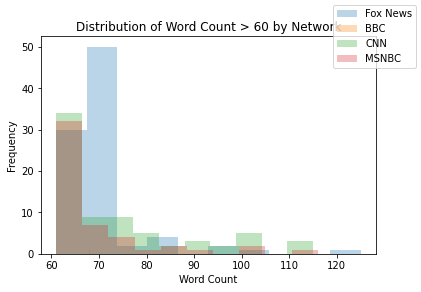

In [62]:
# distribution of word counts under 60
fig, ax = plt.subplots()

fox = chryon_all[(chryon_all['channel'] == 'FOXNEWSW') & (chryon_all['num_words'] > 60)]
bbc = chryon_all[(chryon_all['channel'] == 'BBCNEWS') & (chryon_all['num_words'] > 60)]
cnn = chryon_all[(chryon_all['channel'] == 'CNNW') & (chryon_all['num_words'] > 60)]
msnbc = chryon_all[(chryon_all['channel'] == 'MSNBCW') & (chryon_all['num_words'] > 60)]

ax.hist(fox['num_words'], label='Fox News', alpha=0.3)
ax.hist(bbc['num_words'], label='BBC', alpha=0.3)
ax.hist(cnn['num_words'], label='CNN', alpha=0.3)
ax.hist(msnbc['num_words'], label='MSNBC', alpha=0.3)
ax.set_ylabel('Frequency')
ax.set_xlabel('Word Count')
ax.set_title('Distribution of Word Count > 60 by Network')
fig.legend();

In [75]:
num_words_gt_45 = chryon_all[chryon_all['num_words'] > 35]

In [76]:
len(num_words_gt_45)

121109

In [74]:
len(chryon_all) - 5633

2648713

In [77]:
len(chryon_all)

2654346

In [12]:
# read in existing csv of all data 
chyrons = pd.read_csv('/Users/jonleckie/Desktop/DSI_all/capstones/capstone_two/chyrons/chyron_all.csv')
chyrons.drop(472372, inplace=True)

In [13]:
len(chyrons)

2654346

In [2]:
# get a random sample of
def get_random_sample(df, num_samples):
    idx_lst = [num for num in range(len(df))]
    idx_samps = random.sample(idx_lst, num_samples)
    df_samp = df.iloc[idx_samps]
    return df_samp

In [15]:
# sample df about .25 of whole dataset
chy_samp = get_random_sample(chyrons, 250000)

In [16]:
len(chy_samp)

250000

In [29]:
# sklearn pipeline 

# english dictionary 
eng_dict = words.words()

# get a random sample of chyrons
def get_random_sample(df, num_samples):
    idx_lst = [num for num in range(len(df))]
    idx_samps = random.sample(idx_lst, num_samples)
    df_samp = df.iloc[idx_samps]
    return df_samp

# get stop words
def get_stop_words(words):
    sw = stopwords.words('english')
    stops = words[0]
    
    for lst in words[1:]:
        stops += lst
    
    return sw + stops

# sklearn count vectorizer
def get_countvec(corpus, stop_words='english', min_df=20):
    vectorizer = CountVectorizer(stop_words=stop_words, min_df=min_df)
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names()
    
    return feature_names, X.toarray()

# sklearn tfidf vectorizer
def get_tfidf(corpus, max_features=None, min_df=20):
    vectorizer = TfidfVectorizer(max_features=None, min_df=min_df)
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizerr.get_feature_names()
    
    return feature_names, X.toarray()

# vectorizer to dataframe
def get_dataframe(X, feature_names):
    df = pd.DataFrame(data = X, columns = feature_names)
    return df


In [73]:
words = [list(numeric), odds, unders, multis]

sws = get_stop_words(words)

In [18]:
count_features, chyron_counts = get_countvec(chy_samp['text'], stop_words='english')

In [76]:
counts_df = get_dataframe(chyron_counts, count_features)

In [77]:
# sklearn pipeline 

# english dictionary 
eng_dict = words.words()

# get a random sample of chyrons
def get_random_sample(df, num_samples):
    idx_lst = [num for num in range(len(df))]
    idx_samps = random.sample(idx_lst, num_samples)
    df_samp = df.iloc[idx_samps]
    return df_samp

# get stop words
def get_stop_words(words):
    sw = stopwords.words('english')
    stops = words[0]
    
    for lst in words[1:]:
        stops += lst
    
    return sw + stops

## ------------------------------------------------------ ##

# sklearn count vectorizer
def get_countvec(corpus, stop_words='english', min_df=.01):
    vectorizer = CountVectorizer(stop_words=stop_words, min_df=min_df)
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names()
    
    return feature_names, X.toarray()

# sklearn tfidf vectorizer
def get_tfidf(corpus, max_features=None, min_df=.01, stop_words='english'):
    vectorizer = TfidfVectorizer(max_features=None, min_df=min_df, max_df=1, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names()
    
    return feature_names, X.toarray()

# vectorizer to dataframe
def get_dataframe(X, feature_names):
    df = pd.DataFrame(data = X, columns = feature_names)
    return df

## ------------------------------------------------------ ##

# odd word functions

def get_numeric_words(feature_names):
    stops = set()
    nums = [str(num) for num in range(10)]
    
    for word in feature_names:
        for char in word:
            if char in nums:
                stops.add(word)
                break
                
    return list(stops)

def get_non_alpha_start(feature_names):
    non_alpha = []
    alpha = list(string.ascii_lowercase)
    for name in feature_names:
        if name[0] not in alpha:
            non_alpha.append(name)
            
    return non_alpha

def get_underscores(feature_names):
    unders = []
    for name in feature_names:
        if '_' in name:
            unders.append(name)
            
    return unders

def get_multis(feature_names):
    multi = []
    for name in feature_names:
        if len(name) == 2:
            if name[0] == name[1]:
                multi.append(name)
        else:
            search = re.search(r"([A-Za-z])\1\1", name)
            if search != None:
                multi.append(name)
                
    return multi

# wrap for above 
def get_special_stops(feature_names):
    numeric = get_numeric_words(feature_names)
    non_alpha = get_non_alpha_start(feature_names)
    unders = get_underscores(feature_names)
    multi_lett = get_multis(feature_names)
    
    return [numeric, non_alpha, unders, multi_lett]


## ------------------------------------------------------ ##

# PIPELINE FOR Counts:

def load_samps(num_samples):
    chyrons = pd.read_csv('/Users/jonleckie/Desktop/DSI_all/capstones/capstone_two/chyrons/chyron_all.csv') # read all data
    chyrons.drop(472372, inplace=True) # drop single NaN value
    chy_samp = get_random_sample(chyrons, num_samples) # random sample for working locally 
    
    return chy_samp
    
def clean_counts(chy_samp, min_df=.001):
    count_features, chyron_counts = get_countvec(chy_samp['text'], stop_words='english', min_df=min_df) # get primary feature names
    stops = get_special_stops(count_features) # get additional stop words
    stop_words_plus = get_stop_words(stops) # add to nltk stop words
    count_features, chyron_counts = get_countvec(chy_samp['text'], stop_words=stop_words_plus, min_df=min_df) # get new vector matrix

    return count_features, chyron_counts

def clean_tfidf(chy_samp, min_df=.001):
    tfidf_features, chyron_tfidf = get_tfidf(chy_samp, max_features=None, min_df=min_df, stop_words='english') # get primary feature names
    stops = get_special_stops(tfidf_features) # get additional stop words
    stop_words_plus = get_stop_words(stops) # add to nltk stop words
    tfidf_features, chyron_tfidf = get_tfidf(chy_samp, max_features=None, min_df=min_df, stop_words=stop_words_plus) # get new vector matrix

    return tfidf_features, chyron_tfidf

In [32]:
counts_df = get_dataframe(chyron_counts, count_features)

In [33]:
counts_df.head()

,aaron,aarp,aarpmedicaresupplement,ab,abandon,abandoned,abandoning,abandons,abbas,abbey,...,zito,zoe,zone,zones,zoo,zoom,zu,zuckerberg,zuma,zuzu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Start Setting Up Models

In [78]:
doc_freq = .1

chy_samps = load_samps(num_samples=250000)
count_features, chyron_counts = clean_counts(chy_samps, min_df=doc_freq)
# tfidf_features, chyron_tfidf = clean_tfidf(chy_samps, min_df=doc_freq)

In [92]:
X_counts = get_dataframe(chyron_counts, count_features)
# X_tfidf = get_dataframe(chyron_tfidf, tfidf_features)
y = chy_samps['channel']

In [54]:
len(X_counts), len(X_tfidf), len(y)

(250000, 8, 250000)

In [89]:
# Multinomial Naive Bayes 

import numpy as np 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [93]:
# first split:
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, train_size=0.33, shuffle=True, stratify=y)
# X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(X_tfidf, y, train_size=0.33, shuffle=True, stratify=y)

In [9]:
def eval_naive_bayes(X, y, folds=10):
    kf = KFold(n_splits=folds, shuffle=True)
    accuracy = []
    
    for train, test in kf.split(X):
        model = MultinomialNB(alpha=1)
        model.fit(X.iloc[train], y.iloc[train])
        y_hat = model.predict(X.iloc[test])
        accuracy.append(model.score(X.iloc[test], y.iloc[test]))
    
    return np.mean(accuracy)

def test_folds(X, y, fold_lst):
    accuracy = []
    for folds in fold_lst:
        accuracy.append(eval_naive_bayes(X, y, folds=folds))
        
    return accuracy

def plot_naive_bayes(X, y, fold_lst):
    fig, ax = plt.subplots()
    xs = fold_lst
    ys = test_folds(X, y, fold_lst)
    ax.plot(xs, ys)
    ax.set_title('Naive Bayes Accuracy by Num_Folds')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Folds');

In [ ]:
# def eval_random_forest(X, y, folds=10, n_estimators=100, max_depth=None):
#     kf = KFold(n_splits=folds, shuffle=True)
#     accuracy = []
    
#     for train, test in kf.split(X):
#         model = RandomForestClassifier(n_estimators, max_depth, )
#         model.fit(X.iloc[train], y.iloc[train])
#         y_hat = model.predict(X.iloc[test])
#         accuracy.append(model.score(X.iloc[test], y.iloc[test]))
    
#     return np.mean(accuracy)

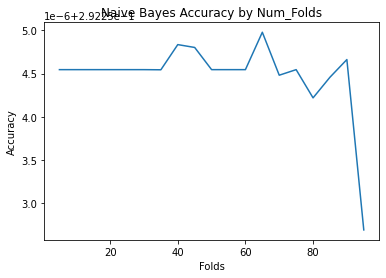

In [84]:
folds = list(range(5, 100, 5))

plot_naive_bayes(X_train, y_train, folds)

In [57]:
eval_naive_bayes(X_train, y_train, folds=100)

0.29304242424242427

In [85]:
def _naive_bayes(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    model = MultinomialNB(alpha=1)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    
    return y_hat, np.array(y_test), model

In [86]:
y_hat, _y_test, model = _naive_bayes(X_train, y_train)

In [87]:
correct = 0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]:
        correct += 1
        
correct / len(y_test)

0.2922666666666667

In [91]:
len(X_test), len(y_test)

(167500, 20625)

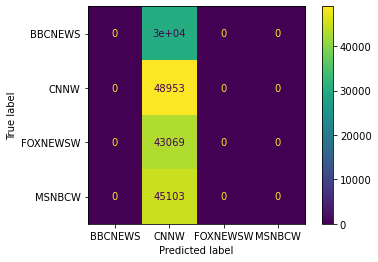

In [94]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [96]:
d = {}
for elem in y_test:
    if elem not in d:
        d[elem] = 1
    d[elem] += 1

In [100]:
for k, v in d.items():
    print(f'{k}:{v} --> {round(v/sum(d.values()), 4) * 100}%')

MSNBCW:45104 --> 26.93%
BBCNEWS:30376 --> 18.13%
CNNW:48954 --> 29.23%
FOXNEWSW:43070 --> 25.71%
